In [177]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import glob

from matplotlib import pyplot as plt

In [70]:
tables_paths=glob.glob('data/tables/*xlsx')
data=[]
for path in tqdm(tables_paths):
    table=pd.read_excel(path)
    keys=[0,2,3,4,6,7,8]
    columns=np.array(list(table.columns))[keys]
    table=table[columns]
    table=table.values
    new_table=[]

    for i,line in enumerate(table):
        if not pd.isnull(line[0]):
            if '.pdf' in line[0]:
                line[0]=line[0][:-4]
            new_table.append(line)

    data.extend(new_table)

df=pd.DataFrame(data, columns=['id', 'surname', 'name', 'code', 'orthography','punctuation', 'grade'])

df['orthography']=pd.to_numeric(df['orthography'], downcast='integer', errors='coerce')
df['punctuation']=pd.to_numeric(df['punctuation'], downcast='integer', errors='coerce')

df.to_csv('grades_orig.csv', index=False)

  0%|          | 0/238 [00:00<?, ?it/s]

In [157]:
def marks2grade(orth, punc):
    grade=0

    if orth==0:
        if punc<=1:
            grade=5

        elif punc<=4:
            grade=4

        elif punc<=8:
            grade=3

    elif orth==1:
        if punc <=3:
            grade=4
        elif punc<=7:
            grade=3
    elif orth==2:
        if punc<=2:
            grade=4
        elif punc<=6:
            grade=3
    elif orth==3:
        if punc<=5:
            grade=3
    elif orth==4:
        if punc<=4:
            grade=3

    if orth>4 or (orth+punc)>8:
        grade=2

    return grade

In [168]:
grades=pd.read_csv('file_names_grades.csv')

new_df=[]
for line in tqdm(df.values):
    gr=line[-1]
    grades_line=grades[grades.ids==line[0]].values

    orth=line[4]
    punc=line[5]
    line[-1]=marks2grade(orth,punc)

    if len(grades_line)>0:
        line=np.append(line, grades_line[0][-1])
        line=np.append(line, True)
    else:
        line=np.append(line, None)
        line=np.append(line, False)


    new_df.append(line)

new_df=pd.DataFrame(new_df, columns=['id', 'surname', 'name', 'code', 'orthography','punctuation', 'grade_true','grade_cv', 'aligned_doc'])
new_df['grade_cv']=pd.to_numeric(new_df['grade_cv'], downcast='integer', errors='coerce')
new_df=new_df.dropna(subset=['orthography','punctuation'])
new_df.to_csv('grades_all.csv', index=False)

  0%|          | 0/8519 [00:00<?, ?it/s]

1) -1 это отсутствие оценки
2) 0 - статус "проверено" без оценки

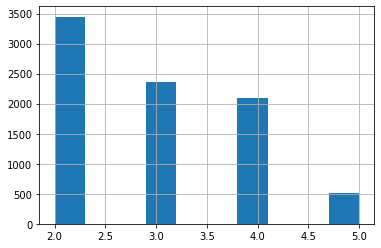

In [180]:
new_df['grade_true'].hist()
plt.show()